In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster.elbow import kelbow_visualizer
%matplotlib inline

In [2]:
webpage_name = "tripadvisor"
divs_data_original = pd.read_csv('./dataframes/df_' + webpage_name + '_basic.csv', index_col=0)

In [3]:
divs_data_original

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
0,/html/body/div[2],/html/body/div[],3,0,48,348.200012,1349.0,448,1,0,0,0,0,0,0.0,0,0.0
1,/html/body/div[2]/div,/html/body/div[]/div,4,0,48,348.200012,1349.0,447,1,0,0,0,0,0,0.0,0,0.0
2,/html/body/div[2]/div/div[2],/html/body/div[]/div/div[],5,0,91,305.000000,1349.0,389,3,0,0,0,0,0,0.0,0,0.0
3,/html/body/div[2]/div/div[2]/div[2]/div/div/di...,/html/body/div[]/div/div[]/div[]/div/div/div[]...,16,0,0,686.000000,1349.0,0,1,0,0,0,0,0,0.0,0,0.0
4,/html/body/div[2]/div/div[2]/div[6],/html/body/div[]/div/div[]/div[],6,0,195,201.000000,1349.0,83,2,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,/html/body/div[4]/div[2]/div/div[2]/div/div[2]...,/html/body/div[]/div[]/div/div[]/div/div[]/div...,10,229,429,317.000000,597.0,136,1,0,0,0,0,0,0.0,0,0.0
742,/html/body/div[4]/div[2]/div/div[2]/div/div[2]...,/html/body/div[]/div[]/div/div[]/div/div[]/div...,11,229,441,293.000000,298.0,67,2,0,16,0,16,12,0.0,12,0.0
743,/html/body/div[4]/div[2]/div/div[2]/div/div[2]...,/html/body/div[]/div[]/div/div[]/div/div[]/div...,12,245,506,228.000000,266.0,48,2,0,0,0,0,0,0.0,0,0.0
744,/html/body/div[4]/div[2]/div/div[2]/div/div[2]...,/html/body/div[]/div[]/div/div[]/div/div[]/div...,11,527,441,293.000000,299.0,67,2,0,16,0,16,12,0.0,12,0.0


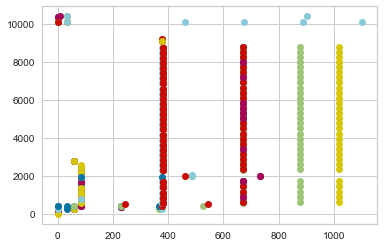

In [4]:
# Gráfica con la posición de cada uno de los elementos diferenciados
# por color según su "reduced_xpath"
groups = divs_data_original.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [5]:
divs_data = divs_data_original

# Subdividir cada conjunto con el mismo "reduced_xpath" según el número de "html_attributes"
# y eliminar las subdivisiones que tengan menos de 8 elementos
for x in set(divs_data['reduced_xpath']):
    print('----------- REDUCED XPATH ' + str(x) + ' -----------')
    df = divs_data[divs_data['reduced_xpath'] == x]
    for y in set(df['html_attributes']):
        df2 = df[df['html_attributes'] == y]
        index = df2.index
        number_of_rows = len(index)
        print('----------- ' + str(y) + ' HTML ATTRIBUTES: ' + str(number_of_rows) + ' ELEMENTO/S -----------')
        print(df2)
        
        if number_of_rows < 8:
            divs_data = divs_data.drop(df2.index)

----------- REDUCED XPATH /html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[] -----------
----------- 1 HTML ATTRIBUTES: 30 ELEMENTO/S -----------
                                                 xpath  \
75   /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
96   /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
118  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
139  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
160  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
191  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
212  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
233  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
254  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
275  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
297  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
318  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
339  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
360  /ht

38           0.0              0          0.0  
----------- REDUCED XPATH /html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div/div[]/div[]/div[]/div[] -----------
----------- 1 HTML ATTRIBUTES: 2 ELEMENTO/S -----------
                                                 xpath  \
174  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
175  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   

                                         reduced_xpath  dom_tree_level  \
174  /html/body/div[]/div[]/div[]/div/div[]/div[]/d...              17   
175  /html/body/div[]/div[]/div[]/div/div[]/div[]/d...              17   

     x_position  y_position     height       width  html_children  \
174         486        1994  75.199997  200.333328              1   
175         486        2069  84.000000  200.333328              0   

     html_attributes  padding_top  padding_right  padding_bottom  \
174                1            0              0               8   
175                1  

691           0.0              0          0.0  
----------- REDUCED XPATH /html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div -----------
----------- 4 HTML ATTRIBUTES: 30 ELEMENTO/S -----------
                                                 xpath  \
77   /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
98   /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
120  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
141  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
162  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
193  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
214  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
235  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
256  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
277  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
299  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
320  /html/body/div[3]/div[1]/div[1]/div/div[2]/div...   
341  /ht

In [6]:
divs_data

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
23,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,13,84,438,101.400009,247.000000,12,2,0,0,16,0,0,0.0,0,0.0
24,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,13,84,540,189.000000,247.000000,32,2,16,0,16,0,0,0.0,0,0.0
25,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,14,84,586,116.000000,247.000000,29,1,0,0,0,0,10,0.0,0,0.0
26,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,13,84,729,202.599991,247.000000,22,2,16,0,16,0,0,0.0,0,0.0
27,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,14,84,775,139.599991,247.000000,19,1,0,0,0,0,10,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,18,671,8805,174.400009,345.866669,31,4,0,0,0,0,0,0.0,0,0.0
706,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,19,671,8805,174.400009,207.516663,10,1,0,0,0,0,0,0.0,0,0.0
707,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,20,671,8805,107.000000,206.516663,9,10,0,12,0,0,0,0.0,0,0.0
708,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...,19,878,8805,174.400009,138.333344,19,1,4,8,0,8,0,0.0,0,0.0


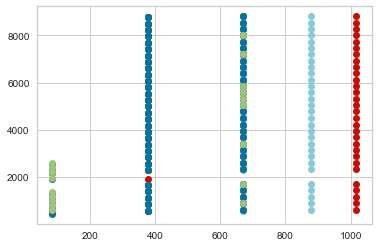

In [7]:
# Gráfica con la posición de cada uno de los elementos diferenciados
# por color según su "reduced_xpath"
groups = divs_data.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [8]:
# Eliminamos los campos que no son númericos (xpath, reduced_xpath), la clasificación correcta (is_search_result)
# y la "posición y" (y_position) ya que varía mucho entre resultados de búsqueda al ser un listado vertical. 
divs_data_r = divs_data.drop(['xpath', 'reduced_xpath', 'y_position'], axis=1)
scaler = MinMaxScaler()
# Estandarización de todos los valores numéricos
divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left']] = scaler.fit_transform(divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left']])
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
23,0.153846,0.000000,0.050376,0.140457,0.091603,0.111111,0.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0
24,0.153846,0.000000,0.379699,0.140457,0.244275,0.111111,1.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0
25,0.230769,0.000000,0.105263,0.140457,0.221374,0.000000,0.00,0.000000,0.0,0.000000,1.0,1.0,0.0,0.0
26,0.153846,0.000000,0.430827,0.140457,0.167939,0.111111,1.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0
27,0.230769,0.000000,0.193985,0.140457,0.145038,0.000000,0.00,0.000000,0.0,0.000000,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.538462,0.629153,0.324812,0.268246,0.236641,0.333333,0.00,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
706,0.615385,0.629153,0.324812,0.089423,0.076336,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
707,0.692308,0.629153,0.071429,0.088130,0.068702,1.000000,0.00,0.500000,0.0,0.000000,0.0,1.0,0.0,0.0
708,0.615385,0.851018,0.324812,0.000000,0.145038,0.000000,0.25,0.333333,0.0,0.666667,0.0,1.0,0.0,0.0


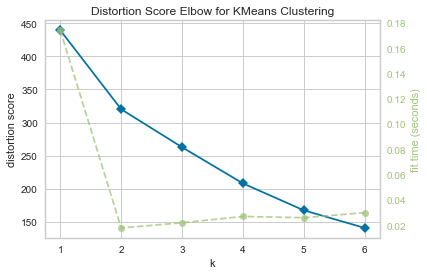

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, locate_elbow=False, model=None)

In [9]:
# Gráfica del elbow method para determinar el número de clusters en kmeans
kelbow_visualizer(KMeans(random_state=4), divs_data_r, k=(1,7), locate_elbow=False)

In [10]:
# Calculamos automáticamente el codo de la gráfica
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(divs_data_r)
    Sum_of_squared_distances.append(km.inertia_)
    
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')

In [11]:
# Ejecución del algoritmo kmeans con el k anteriormente calculado
model = KMeans(n_clusters=kn.knee)
model.fit(divs_data_r)
yhat = model.predict(divs_data_r)

# Añadimos al dataframe "y_position" estandarizada para poder representar los puntos
divs_data_r['y_position'] = divs_data['y_position']
scaler = MinMaxScaler()
divs_data_r[['y_position']] = scaler.fit_transform(divs_data_r[['y_position']])
# Añadimos una nueva columna "cluster" que indique a qué cluster ha sido asignado cada elemento
divs_data_r['cluster'] = yhat

In [12]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster
23,0.153846,0.000000,0.050376,0.140457,0.091603,0.111111,0.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0
24,0.153846,0.000000,0.379699,0.140457,0.244275,0.111111,1.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.012191,2
25,0.230769,0.000000,0.105263,0.140457,0.221374,0.000000,0.00,0.000000,0.0,0.000000,1.0,1.0,0.0,0.0,0.017689,0
26,0.153846,0.000000,0.430827,0.140457,0.167939,0.111111,1.00,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.034779,2
27,0.230769,0.000000,0.193985,0.140457,0.145038,0.000000,0.00,0.000000,0.0,0.000000,1.0,1.0,0.0,0.0,0.040277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.538462,0.629153,0.324812,0.268246,0.236641,0.333333,0.00,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.000000,0
706,0.615385,0.629153,0.324812,0.089423,0.076336,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.000000,0
707,0.692308,0.629153,0.071429,0.088130,0.068702,1.000000,0.00,0.500000,0.0,0.000000,0.0,1.0,0.0,0.0,1.000000,0
708,0.615385,0.851018,0.324812,0.000000,0.145038,0.000000,0.25,0.333333,0.0,0.666667,0.0,1.0,0.0,0.0,1.000000,3


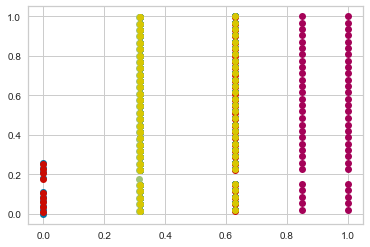

In [13]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [14]:
# Recuperamos las columnas "xpath" y "reduced_path" para continuar con el filtrado
divs_data_r['xpath'] = divs_data['xpath']
divs_data_r['reduced_xpath'] = divs_data['reduced_xpath']
# Datos agrupados según su cluster, donde podemos ver un resumen de sus características
divs_data_r.groupby(divs_data_r['cluster'], as_index=False).mean().sort_values(by='width', ascending=False)

,cluster,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position
1,1,0.076078,0.316526,0.655135,0.998296,0.820485,0.454212,0.000000,0.000000,0.000000,0.000000,0.263736,1.00000,0.0,0.0,0.516246
2,2,0.213018,0.483964,0.598246,0.510125,0.492464,0.025641,0.807692,0.384615,0.807692,0.000000,0.000000,1.00000,0.0,0.0,0.429698
4,4,0.307692,0.473205,0.500401,0.232917,0.268066,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1.00000,0.0,0.0,0.523150
0,0,0.609178,0.430750,0.505776,0.208663,0.172045,0.182016,0.000000,0.036675,0.002445,0.000000,0.022005,0.92665,0.0,0.0,0.512530
3,3,0.500000,0.925509,0.352005,0.079222,0.168957,0.000000,0.125000,0.166667,0.000000,0.833333,0.000000,1.00000,0.0,0.0,0.526258


In [15]:
# Guarda los números de aquellos clusters con std = 0 en la columna 
# "y_position" (es decir, misma y), para posteriormente eliminarlos
delete = []

# Para aquellos clusters que contengan más de un "reduced_xpath"
# distinto, nos quedamos únicamente con el más corto.
for x in set(divs_data_r['cluster']):
    print('----------- CLUSTER ' + str(x) + ' -----------')
    df = divs_data_r[divs_data_r['cluster'] == x]
    xpath = len(set(df['reduced_xpath']))
    
    if (xpath > 1):
        df_drop = df[df['reduced_xpath'] != min(list(df['reduced_xpath']), key=len)]
        df = df.drop(df_drop.index)
        divs_data_r = divs_data_r.drop(df_drop.index)
        
    print(df['reduced_xpath'].value_counts())
    
    std = df.std(axis = 0, skipna = True)
    print("std['y_position'] == " + str(std['y_position']))
    
    if (std['y_position'] == 0):
        delete.append(x)

----------- CLUSTER 0 -----------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div[]/div[]    1
Name: reduced_xpath, dtype: int64
std['y_position'] == nan
----------- CLUSTER 1 -----------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]    31
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2961401786088062
----------- CLUSTER 2 -----------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div[]/div[]    9
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.0891508244075929
----------- CLUSTER 3 -----------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]    30
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.29465837167793724
----------- CLUSTER 4 -----------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]    30
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.29465837167793724


In [16]:
print("Clusters a eliminar con std['y_position'] == 0: " + str(delete))
# Eliminamos clusters cuyos elementos tengan la misma "y"
for i in delete:
    divs_data_r = divs_data_r[divs_data_r.cluster != i] 

Clusters a eliminar con std['y_position'] == 0: []


In [17]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath
23,0.153846,0.000000,0.050376,0.140457,0.091603,0.111111,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
24,0.153846,0.000000,0.379699,0.140457,0.244275,0.111111,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.012191,2,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
26,0.153846,0.000000,0.430827,0.140457,0.167939,0.111111,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.034779,2,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
29,0.153846,0.000000,0.345113,0.140457,0.290076,0.111111,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.058922,2,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
31,0.153846,0.000000,0.504511,0.140457,0.343511,0.111111,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.080435,2,/html/body/div[3]/div[1]/div[1]/div/div[1]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.230769,0.317256,0.639098,0.197587,0.267176,0.000000,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.961755,4,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
688,0.384615,1.000000,0.308271,0.158445,0.122137,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.967969,3,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
689,0.000000,0.315113,0.646617,1.000000,0.763359,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.993666,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
692,0.230769,0.317256,0.639098,0.197587,0.244275,0.000000,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.993785,4,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...


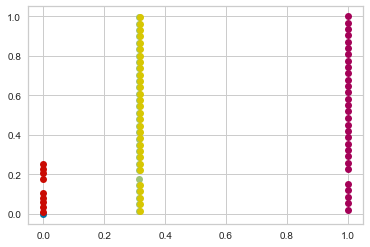

In [18]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [19]:
# Mostramos todos los "reduced_xpath" distintos del dataframe y su número de ocurrencias
print(divs_data_r['reduced_xpath'].value_counts())

/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]                                31
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]    30
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]                30
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div[]/div[]                        10
Name: reduced_xpath, dtype: int64


In [20]:
# Nos quedamos con el cluster cuyo "reduced_xpath" esté contenido en el mayor
# número de los otros "reduced_xpath", es decir "el xpath padre"
xpath_list = list(divs_data_r['reduced_xpath'])

apariciones = 0
xpath_res = ''

for x in xpath_list:
    contador = -1
    
    for y in xpath_list:
        
        if x in y:
            contador += 1
    
    if xpath_res == '' and apariciones == 0:
        xpath_res = x
        apariciones = contador
    
    elif contador > apariciones:
        xpath_res = x
        apariciones = contador

print("--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------")
print(xpath_res)

--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------
/html/body/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[]


In [21]:
df_res = divs_data_r[divs_data_r['reduced_xpath'] == xpath_res]
df_res

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath
62,0.0,0.315113,0.733083,1.0,1.000000,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.013266,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
83,0.0,0.315113,0.646617,1.0,0.847328,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.048046,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
105,0.0,0.315113,0.733083,1.0,0.961832,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.080076,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
126,0.0,0.315113,0.646617,1.0,0.854962,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.114856,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
147,0.0,0.315113,0.651880,1.0,0.908397,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.146887,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
169,0.0,0.315113,1.000000,1.0,0.122137,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.178081,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
178,0.0,0.315113,0.646617,1.0,0.816794,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.221346,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
199,0.0,0.315113,0.646617,1.0,0.809160,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.253376,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
220,0.0,0.315113,0.646617,1.0,0.938931,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.285407,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...
241,0.0,0.315113,0.646617,1.0,0.824427,0.444444,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.317438,1,/html/body/div[3]/div[1]/div[1]/div/div[2]/div...,/html/body/div[]/div[]/div[]/div/div[]/div[]/d...


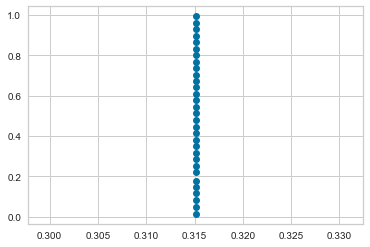

In [22]:
# Gráfica con la posición de cada uno de los elementos resultantes
groups = df_res.groupby("reduced_xpath")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [23]:
# Nos quedamos con los xpaths de los elementos identificados, que podrán
# ser extraídos mediante su xpath en la aplicación que así lo necesite
df_res = df_res.drop(['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 'margin_left', 'y_position', 'cluster', 'reduced_xpath'], axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_res

,xpath
62,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[2]
83,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[3]
105,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[4]
126,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[5]
147,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[7]
169,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[8]
178,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[10]
199,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[11]
220,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[13]
241,/html/body/div[3]/div[1]/div[1]/div/div[2]/div[3]/div[2]/div[3]/div[14]


In [24]:
df_res.to_csv("./dataframes/res_" + webpage_name + "_basic.csv", header=True)